In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [59]:
Happiness=pd.read_csv("World Happiness Report")
Happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [60]:
Happiness.keys


<bound method NDFrame.keys of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.

In [61]:
Happiness.shape

(158, 12)

In [62]:
Happiness.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [63]:
Happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

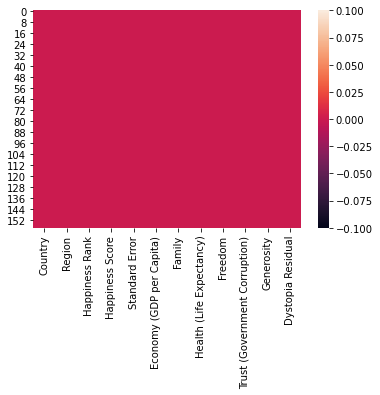

In [64]:
sns.heatmap(Happiness.isnull())

In [65]:
Happiness=Happiness.corr()
Happiness

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [66]:
Happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.369945,0.375061,0.002004,0.294760,0.294539,0.276201,0.298407,0.234293,0.166586,0.122799
std,0.585347,0.585455,0.376865,0.549926,0.494308,0.532439,0.422780,0.379665,0.339001,0.401296
min,-0.992105,-0.992105,-0.310287,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
25%,-0.735121,0.234039,-0.178057,0.002166,0.102664,0.041318,0.137207,0.026573,-0.068945,-0.020084
50%,-0.539443,0.549342,-0.125251,0.339092,0.323562,0.304406,0.372108,0.262229,0.097924,0.051421
75%,-0.213185,0.736504,0.040876,0.747049,0.616751,0.675926,0.480522,0.373370,0.252172,0.132083
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
Happiness.skew()

Happiness Rank                   1.598560
Happiness Score                 -1.604349
Standard Error                   2.441295
Economy (GDP per Capita)        -0.658167
Family                          -0.772603
Health (Life Expectancy)        -0.566255
Freedom                         -0.626480
Trust (Government Corruption)    0.401979
Generosity                       1.825903
Dystopia Residual                0.983623
dtype: float64

<AxesSubplot:>

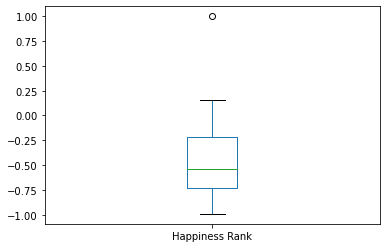

In [68]:
Happiness["Happiness Rank"].plot.box()

<AxesSubplot:>

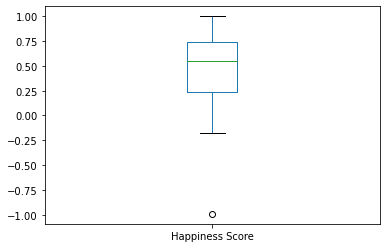

In [69]:
Happiness["Happiness Score"].plot.box()

<AxesSubplot:>

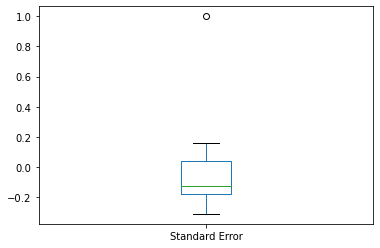

In [70]:
Happiness["Standard Error"].plot.box()

<AxesSubplot:>

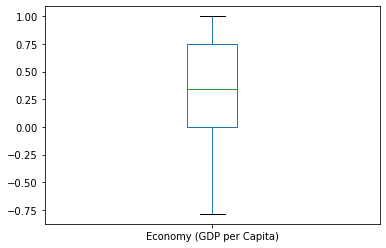

In [71]:
Happiness["Economy (GDP per Capita)"].plot.box()

<AxesSubplot:>

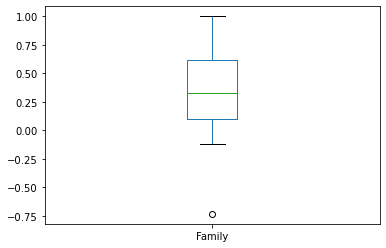

In [72]:
Happiness["Family"].plot.box()

<AxesSubplot:>

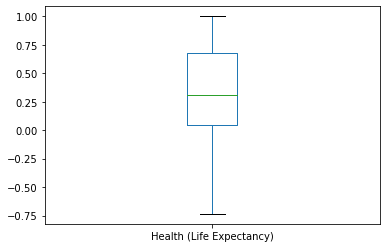

In [73]:
Happiness["Health (Life Expectancy)"].plot.box()

<AxesSubplot:>

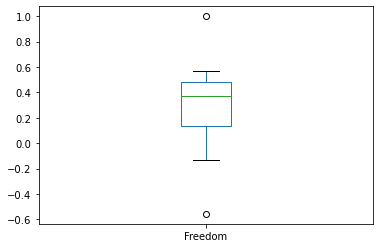

In [74]:
Happiness["Freedom"].plot.box()

<AxesSubplot:>

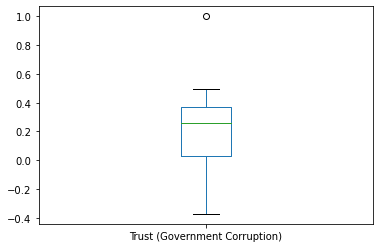

In [75]:
Happiness["Trust (Government Corruption)"].plot.box()

<AxesSubplot:>

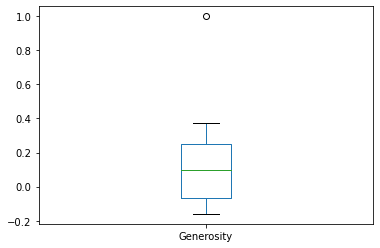

In [76]:
Happiness["Generosity"].plot.box()

<AxesSubplot:>

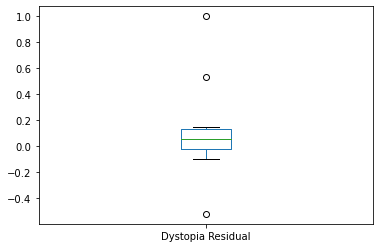

In [77]:
Happiness["Dystopia Residual"].plot.box()

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

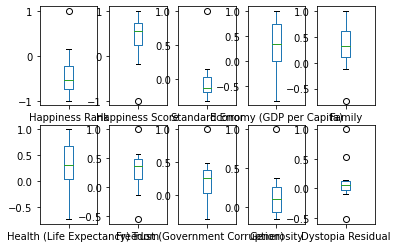

In [78]:
Happiness.plot(kind="box",subplots=True,layout=(2,5))

In [79]:
Happiness.skew()

Happiness Rank                   1.598560
Happiness Score                 -1.604349
Standard Error                   2.441295
Economy (GDP per Capita)        -0.658167
Family                          -0.772603
Health (Life Expectancy)        -0.566255
Freedom                         -0.626480
Trust (Government Corruption)    0.401979
Generosity                       1.825903
Dystopia Residual                0.983623
dtype: float64

In [80]:
Happiness.shape

(10, 10)

<AxesSubplot:>

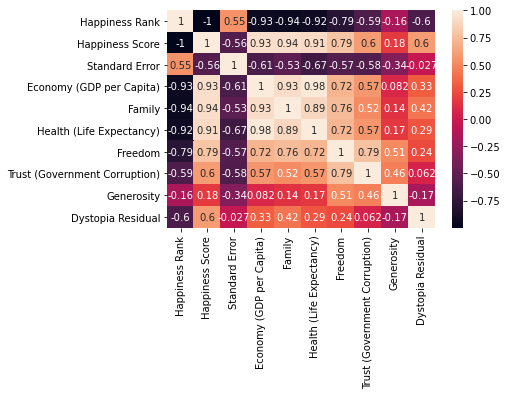

In [81]:
corr=Happiness.corr()
sns.heatmap(corr,annot=True)

In [82]:
from scipy.stats import zscore
z=np.abs(zscore(Happiness))
threshold=3
Happiness_new=Happiness[(z<3).all(axis=1)]

In [83]:
Happiness_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [84]:
Happiness_new.skew()

Happiness Rank                   1.598560
Happiness Score                 -1.604349
Standard Error                   2.441295
Economy (GDP per Capita)        -0.658167
Family                          -0.772603
Health (Life Expectancy)        -0.566255
Freedom                         -0.626480
Trust (Government Corruption)    0.401979
Generosity                       1.825903
Dystopia Residual                0.983623
dtype: float64

In [85]:
x=Happiness_new.drop("Happiness Score",axis=1) #separating independent and target variable
y=Happiness_new["Happiness Score"]

In [86]:
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [87]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [88]:
x

array([[ 1.82670395,  1.06397619, -1.78549352, -1.86059197, -1.76588954,
        -1.88139771, -1.81643256, -1.57398648, -2.10424679],
       [-1.65971663, -0.51171841,  0.97215743,  1.00592091,  0.90455811,
         0.64928849,  0.49088072,  0.4130336 ,  1.0941403 ],
       [ 1.21433337,  1.92545656, -1.03399534, -0.96336556, -1.16406788,
        -1.09392907, -1.17457787, -0.99462307,  0.01841076],
       [-0.86983348, -0.84461807,  1.5416645 ,  0.74207132,  1.1355927 ,
         0.09202112,  0.25737499, -0.4762203 , -0.10620166],
       [-0.69341673, -0.10989761,  0.64137835,  1.7783945 ,  0.44409961,
         0.28709696, -0.02407284,  0.03556539,  0.19311879],
       [-0.69999911, -1.77298807,  1.06155054,  0.44040397,  1.61541275,
         0.06560444,  0.09460217,  0.12809993, -0.16754882],
       [-0.14924244, -0.16950091,  0.02469234,  0.21498078,  0.06416806,
         2.02261558,  0.74708728,  0.97922549, -0.04120047],
       [ 0.32469039, -0.52003009, -0.10486991, -0.33010162, -0

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.metrics import r2_score

In [90]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs very well")
        print("At random state ",i)
        print("training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("testing r2_score is:-", r2_score(y_test,pred_test)*100)

In [91]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=13,test_size=0.20)

# LASSO

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [93]:
from sklearn.linear_model import Lasso 

In [94]:
parameters = {'alpha':[.0001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [95]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls=ls.predict(x_test_b)

lss=r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At cv",j)
    print("Cross validation scoreis :-",lsc*100)
    print("r2 score is :-",lss*100)
    print("\n")

At cv 2
Cross validation scoreis :- -152.9571142481884
r2 score is :- -7919.558802295812


At cv 3
Cross validation scoreis :- 15.714161249446814
r2 score is :- -7919.558802295812


At cv 4
Cross validation scoreis :- -1744.5187415433377
r2 score is :- -7919.558802295812


At cv 5
Cross validation scoreis :- -2597.318513530395
r2 score is :- -7919.558802295812


At cv 6
Cross validation scoreis :- nan
r2 score is :- -7919.558802295812


At cv 7
Cross validation scoreis :- nan
r2 score is :- -7919.558802295812


At cv 8
Cross validation scoreis :- nan
r2 score is :- -7919.558802295812


At cv 9
Cross validation scoreis :- nan
r2 score is :- -7919.558802295812




In [96]:
print("At cv :-",3)
print("Crosss validation score is :-",92.268)
print("r2 score is :-",99.550)

At cv :- 3
Crosss validation score is :- 92.268
r2 score is :- 99.55


In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.2541247983610744
Mean Squared Error: 0.06460498446748672
Root Mean Square Error: 0.2541751059161513


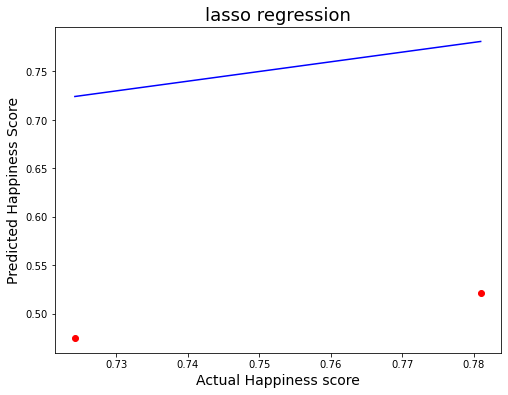

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b, y_test_b, color='b')
plt.xlabel('Actual Happiness score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('lasso regression',fontsize=18)
plt.show()

In [99]:
import pickle
filename='world_happiness.pkl'
pickle.dump(ls,open(filename,'wb'))

In [100]:
a=np.array(y_test)
a

array([ 0.5682109 , -0.17725381])

In [101]:
predicted=np.array(ls.predict(x_test))
happy_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
happy_com

,original,predicted
0,0.568211,0.568243
1,-0.177254,-0.176908
